### In this example we will use regression using Decision Tree

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# loading the data

dataset = pd.read_csv('non_linear_regression_dataset.csv')
dataset.head(3)

,Age,Experience,Rating,Salary
0,37.454012,8.446753,7.582632,1994.889275
1,95.071431,13.929517,0.245869,2099.678611
2,73.199394,8.850524,0.221236,2129.254232


In [4]:
# check the null values
dataset.isnull().sum()

Age           0
Experience    0
Rating        0
Salary        0
dtype: int64

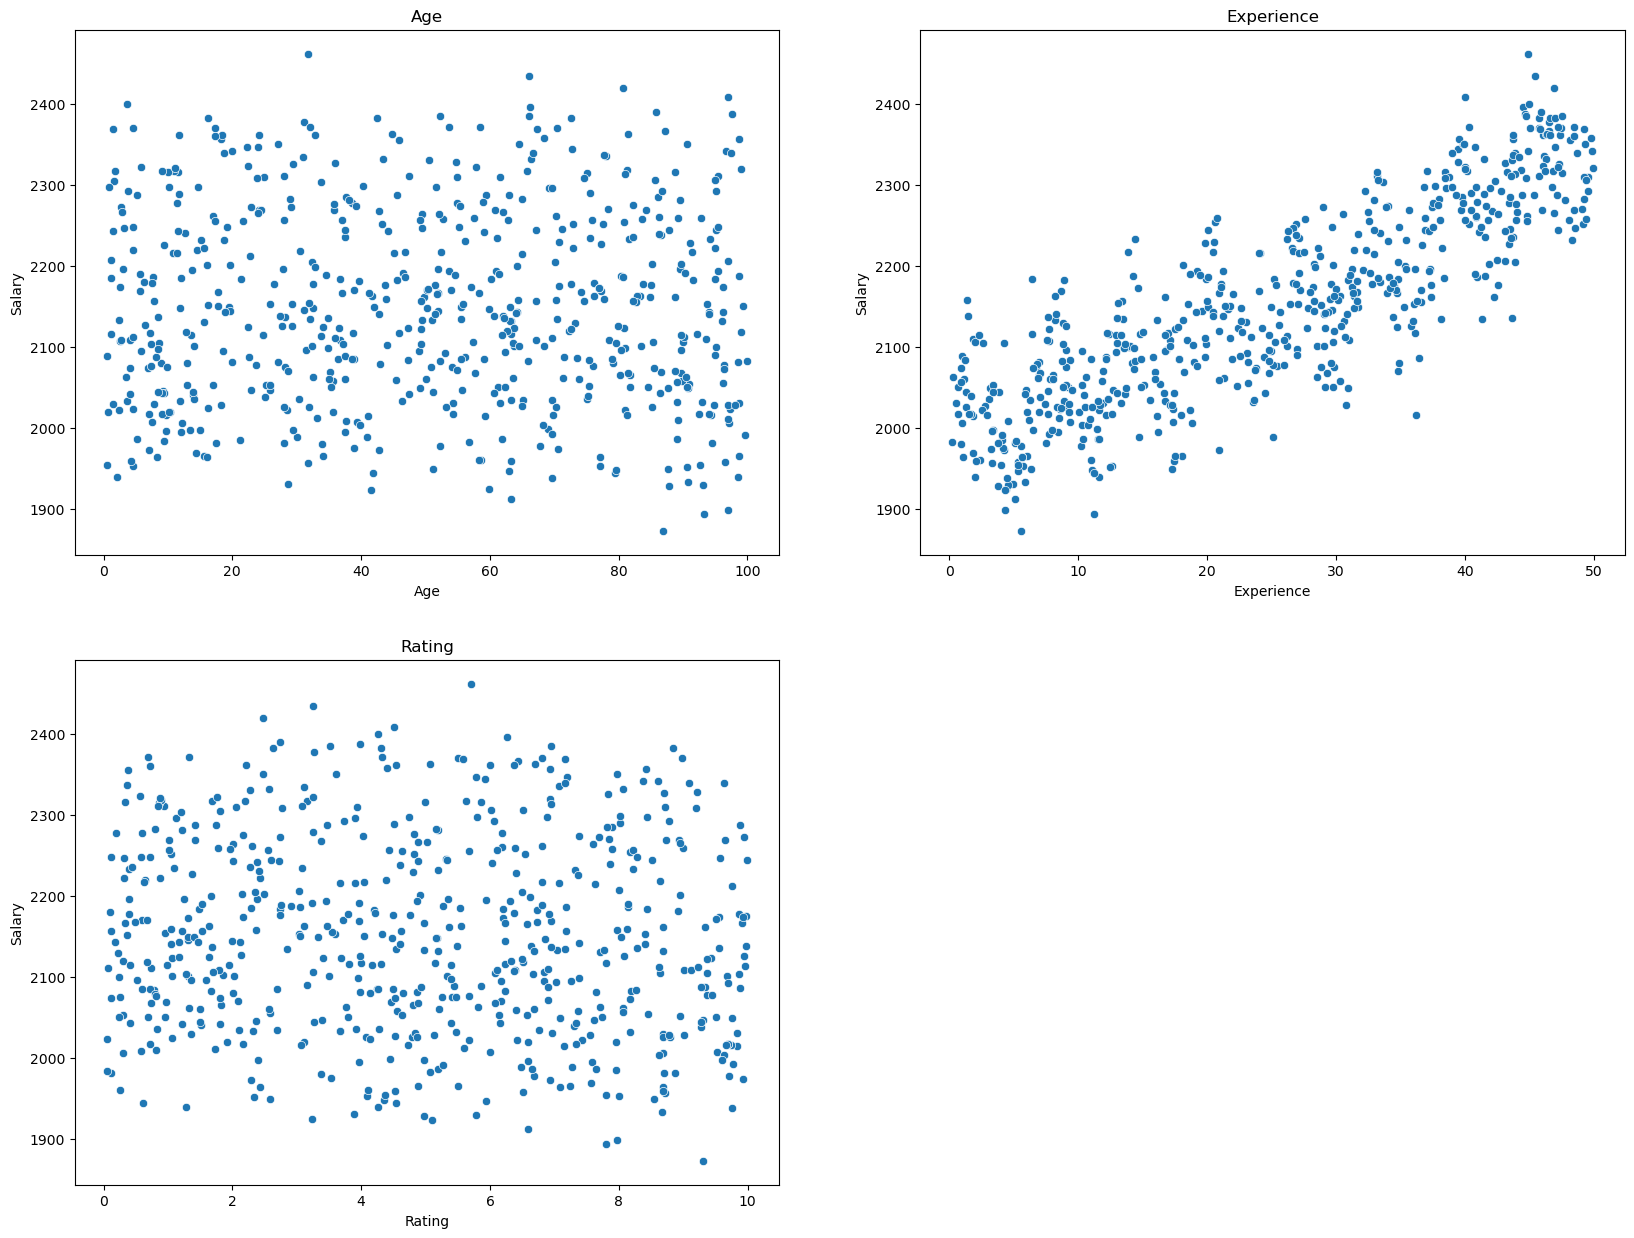

In [8]:
# plt the graph to check the linearity 

plt.figure(figsize=(20,15))
for i, col in enumerate(dataset.columns[:-1]):
    plt.subplot(2, 2, i +1)
    sns.scatterplot(x= col, y='Salary', data=dataset)
    plt.title(col)

plt.show()

In [9]:
# input and output variables selections
x = dataset.iloc[:, :-1]
y = dataset['Salary']

In [26]:
# train test and split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)

In [27]:
# model preparation

from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor()

In [28]:
# train the model

dtr.fit(x_train, y_train)


DecisionTreeRegressor()

In [29]:
# check the accuracy

dtr.score(x_test, y_test)

0.5467670953329755

In [30]:
# check the accuracy with the training data

dtr.score(x_train, y_train)

# its look like out model is over fitted because it show 100% accuracy with training data but 54% with test data

1.0

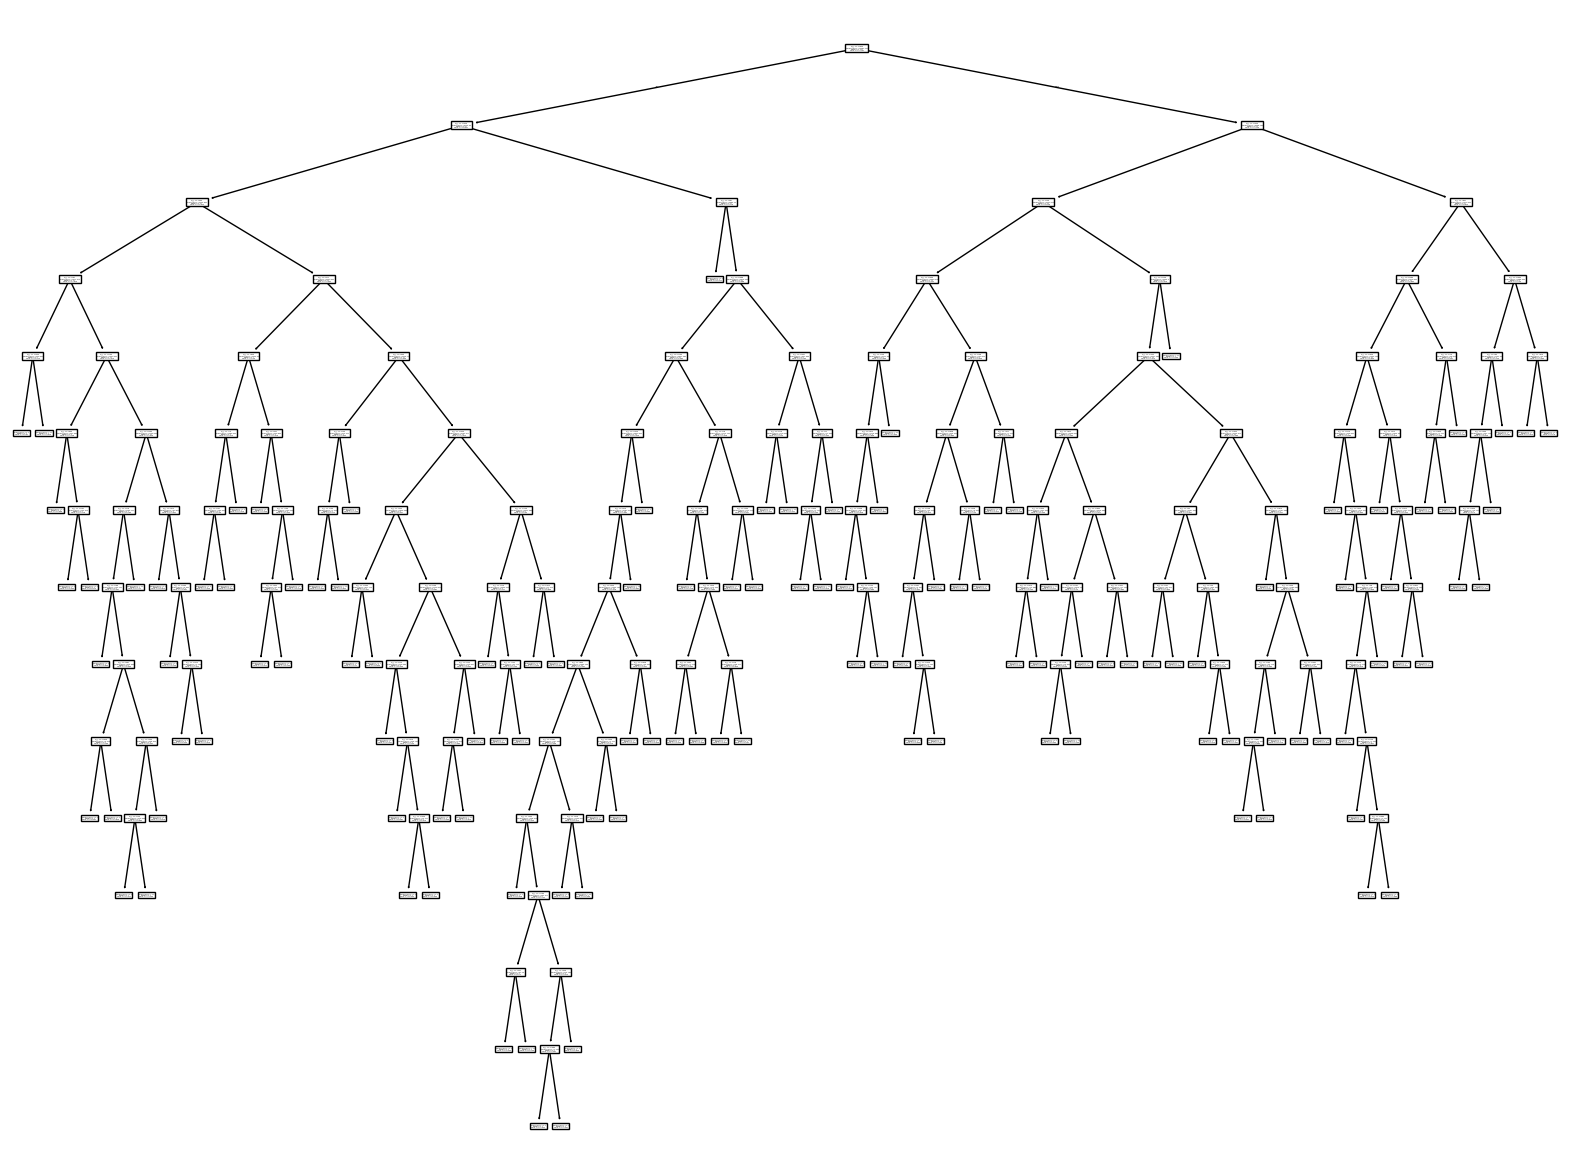

In [32]:
# show the graph

plt.figure(figsize=(20,15))
plot_tree(dtr)
plt.show()

In [33]:
# now check the accuracy with the pruning

for i in range(1,15):
    dt1= DecisionTreeRegressor(max_depth=i)
    dt1.fit(x_train, y_train)
    print(dt1.score(x_test, y_test), dt1.score(x_train, y_train), i)

0.5551591656617958 0.5979341268876142 1
0.6944257222973504 0.7665209928588841 2
0.6988046820203868 0.7967319029736016 3
0.697760086641256 0.8379291892891234 4
0.6520059680021026 0.8912236107751366 5
0.6236235445356619 0.9321164349685629 6
0.581109939005876 0.9611546965616412 7
0.5259955399902021 0.9878738987654055 8
0.5355969216536152 0.9951613393592724 9
0.548371261618005 0.9969510329730605 10
0.5540336222324148 0.9991815430681255 11
0.5315816475132406 0.9996887110793017 12
0.5431345956324212 0.9999999171678271 13
0.5348106764768916 1.0 14


In [34]:
#no use 4 as a max_depth

dtr2 = DecisionTreeRegressor(max_depth=4)
dtr2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [35]:
# check accuracy
dtr2.score(x_test, y_test)

0.7064389981437971

In [38]:
dataset.iloc[78,:]

Age             35.846573
Experience      48.473522
Rating           1.424955
Salary        2268.234795
Name: 78, dtype: float64

In [39]:
# predict this using above data and salary should closest
dtr2.predict([dataset.iloc[78,:-1]])

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([2327.82631165])

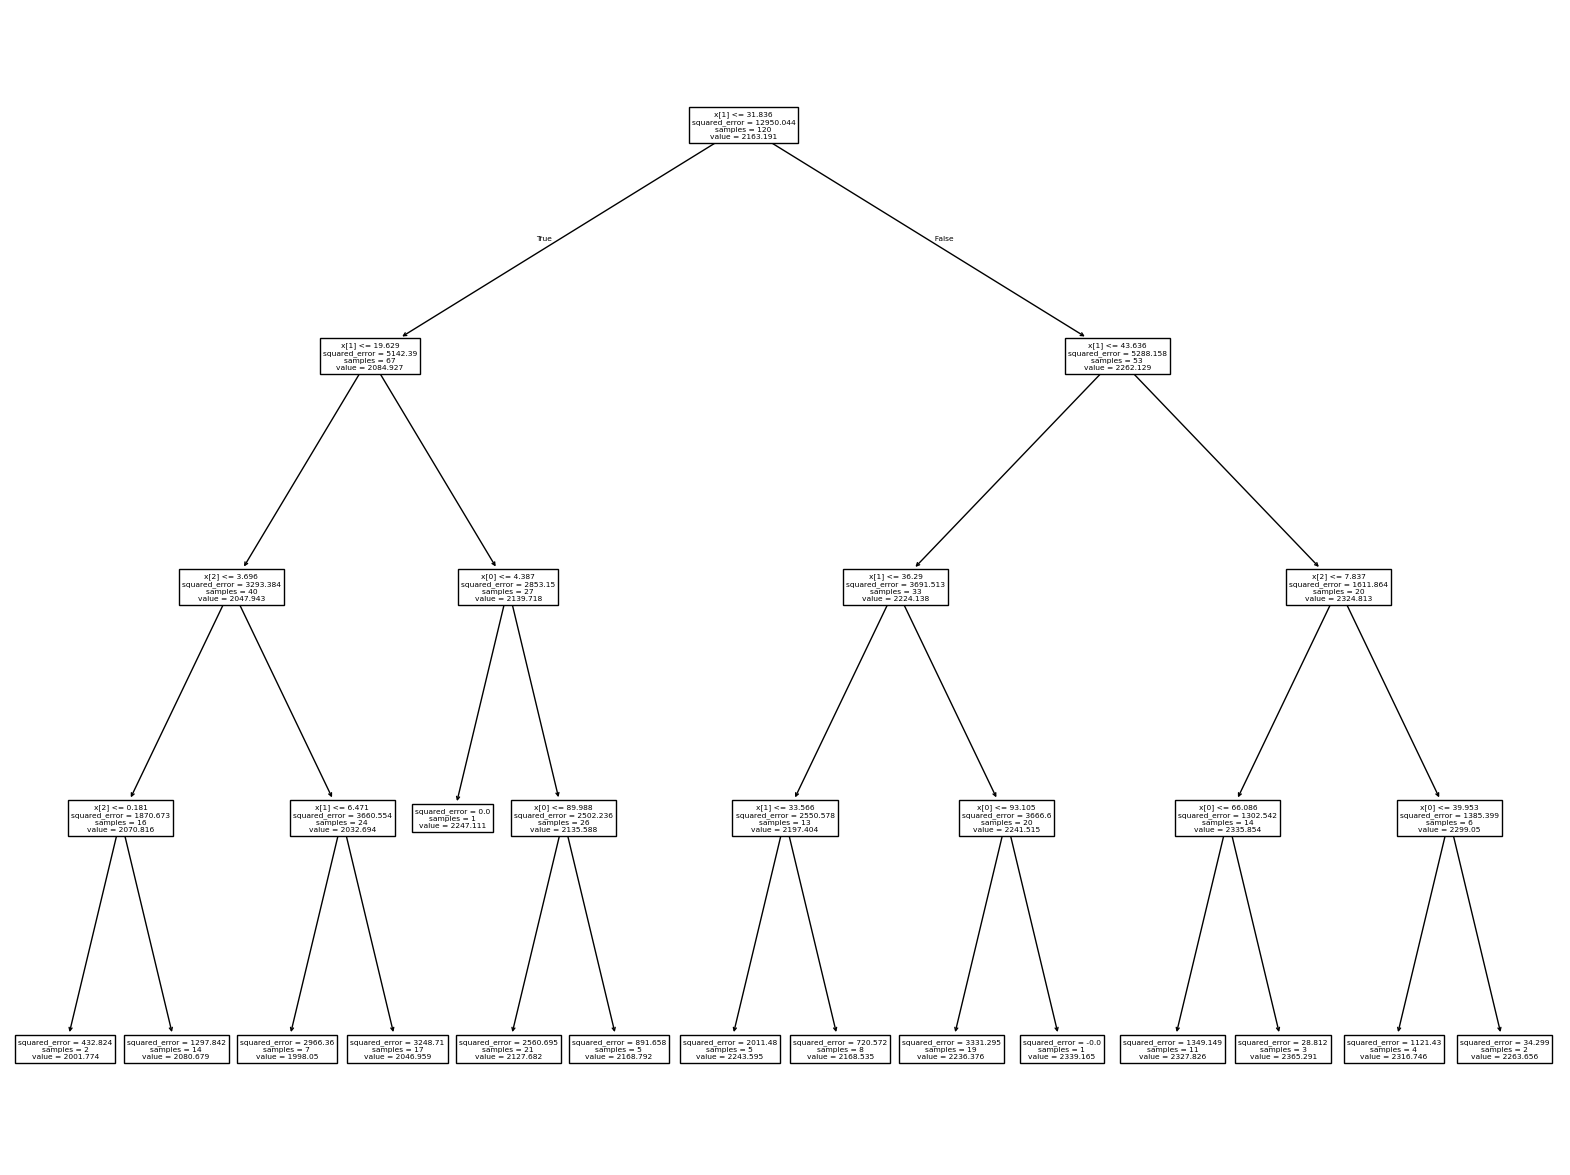

In [ ]:
# plot the graph now for dtr2

plt.figure(figsize=(20,15))
plot_tree(dtr2)
plt.show()

## Using scaling the dataset to reduce the magnitude

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
ss = StandardScaler()

In [43]:
dataset.head(3)

,Age,Experience,Rating,Salary
0,37.454012,8.446753,7.582632,1994.889275
1,95.071431,13.929517,0.245869,2099.678611
2,73.199394,8.850524,0.221236,2129.254232


In [44]:
# scale the salary

dataset_new = dataset.copy()
dataset_new['Salary'] = ss.fit_transform(dataset_new[['Salary']])

dataset_new.head(3)

,Age,Experience,Rating,Salary
0,37.454012,8.446753,7.582632,-1.283479
1,95.071431,13.929517,0.245869,-0.412893
2,73.199394,8.850524,0.221236,-0.167180


In [45]:
# input and output variable selection

x_new = dataset_new.iloc[:, :-1]
y_new = dataset_new['Salary']

In [46]:
# train test split again

x1_train, x1_test, y1_train, y1_test = train_test_split(x_new, y_new, train_size=0.2, random_state=42)

In [55]:
# model preparation and training

dtr3 = DecisionTreeRegressor(max_depth=4)
dtr3.fit(x1_train, y1_train)

DecisionTreeRegressor(max_depth=4)

In [56]:
# check the accuracy

dtr3.score(x1_test, y1_test)

0.6979862053797571

In [ ]:
# looks like there is no change in accuracy even after scaling the feature